In [1]:
from sklearn.cluster import KMeans 
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("income_clustering.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income($)')

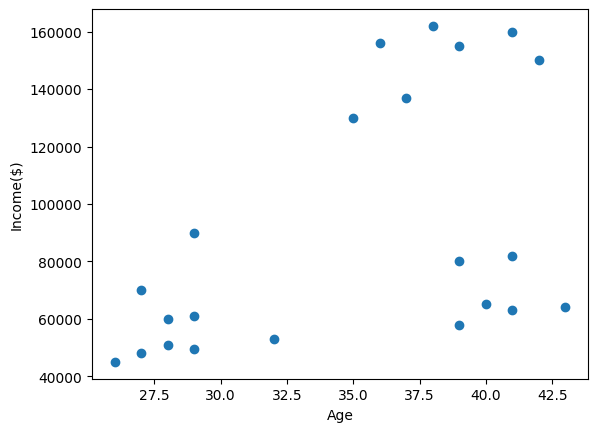

In [3]:
plt.scatter(df.Age,df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [4]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [5]:
df["clusters"]=y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [6]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

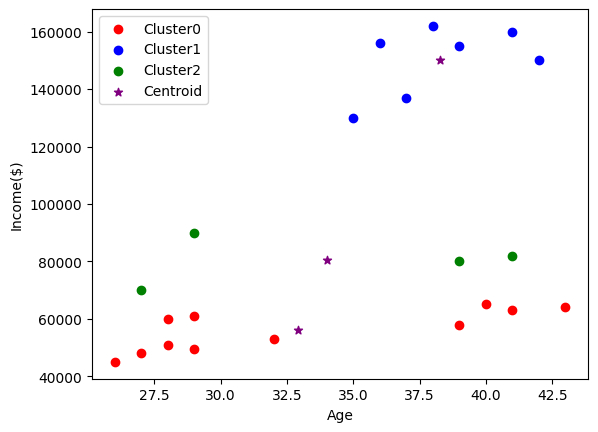

In [7]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]

plt.scatter(df1.Age,df1["Income($)"],color="red",label="Cluster0")
plt.scatter(df2.Age,df2["Income($)"],color="blue",label="Cluster1")
plt.scatter(df3.Age,df3["Income($)"],color="green",label="Cluster2")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="Centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()
plt.show()

In [8]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)


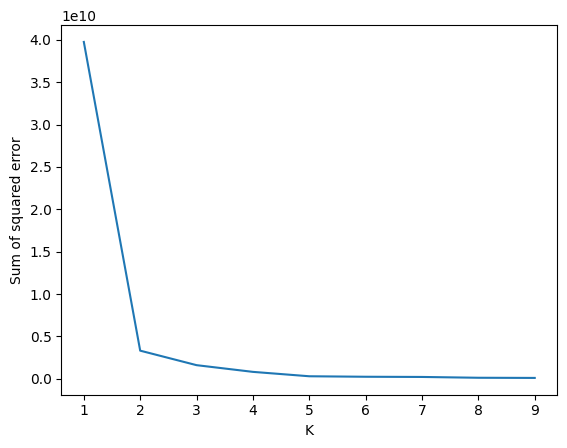

In [9]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng,sse)